In [2]:
import numpy as np
import pandas as pd

ds=pd.read_csv("Pokemon.csv")

#to read excel file
# df_xlsx=pd.read_excel('filename.xlsx')

#tab seperated file
# df= pd.read_csv("txt file",delimiter="\t")




In [55]:
# ds.describe()
# ds.head(10)
# ds.isnull()
# data=pd.DataFrame(ds);
# data.shape
# ds.shape
# ds
# ds.isnull().sum().sum()
# data.info()
# len(ds)
# ds.count()
# ds.max()
# ds.tail(20)



AttributeError: 'DataFrame' object has no attribute 'isnan'

In [73]:
# print(ds.head(10))
# ds.columns
# ds['Name'][0:5] #prints 0 to 5 pokemon names, i.e Name column
# ds.Speed
# ds[['Name','Speed','HP','Legendary']]

#============== to get row / rows
# ds.iloc[1]    #prints first row
# ds.iloc[1:4]    #prints row index1 to index 3

# for index,row in ds.iterrows():
#     print(index,row['Name'])

#============== to get a specific location
# ds.iloc[2,1]   #second row ka 1st column

#********************************
# ds.loc[ds['Name'] =='Chikorita']
# ds.loc[ds['Type 1']=='Water']
# ds.describe()

# ds.sort_values('Legendary',ascending=False)
# ds.sort_values(['Type 1','HP'], ascending=False)
# ds.sort_values(['Type 1','HP'], ascending=[1,0])   #type 1->ascending, hp->descending



,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
520,469,Yanmega,Bug,Flying,515,86,76,86,116,56,95,4,False
698,637,Volcarona,Bug,Fire,550,85,60,65,135,105,100,5,False
231,214,Heracross,Bug,Fighting,500,80,125,75,40,95,85,2,False
232,214,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False
678,617,Accelgor,Bug,NaN,495,80,70,40,100,60,145,5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,98,Krabby,Water,NaN,325,30,105,90,25,25,50,1,False
125,116,Horsea,Water,NaN,295,30,40,70,70,25,60,1,False
129,120,Staryu,Water,NaN,340,30,45,55,70,55,85,1,False
139,129,Magikarp,Water,NaN,200,20,10,55,15,20,80,1,False


In [81]:
#add column
ds['TotalRank']=ds['HP']+ds['Attack']+ds['Defense']+ds['Sp. Atk']+ds['Sp. Def']+ ds['Speed']


In [105]:
ds=ds.drop('Total',axis=1)
ds.head()
45+49+49+65+45+65
ds.sort_values('TotalRank',ascending=False) 

#================another way to drop==========
ds=ds.drop(columns=['TotalRank'])
ds.head()

#axis=0 :vertical ,axis=1:horizontal
ds['Total2']= ds.iloc[:,4:10].sum(axis=1) #not recommended, as data changes,indexes provided might screw up whole dataset
ds.head()

#================to bring total next to legendary column (from last column)
cols=list(ds.columns)
ds=ds[cols[0:4]+[cols[-1]]+cols[4:12]]
ds.head()


,#,Name,Type 1,Type 2,Legendary,Total2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,1,Bulbasaur,Grass,Poison,False,318,45,49,49,65,65,45,1
1,2,Ivysaur,Grass,Poison,False,405,60,62,63,80,80,60,1
2,3,Venusaur,Grass,Poison,False,525,80,82,83,100,100,80,1
3,3,VenusaurMega Venusaur,Grass,Poison,False,625,80,100,123,122,120,80,1
4,4,Charmander,Fire,NaN,False,309,39,52,43,60,50,65,1


In [52]:
#saved the current file in PC as modified.csv
ds.to_csv('modified.csv', index=False)
# ds.to_excel('modified.xlsx',index=False)  #isnt working
# ds.to_csv('modified2.txt',index=False,sep='\t')  #to delimiter param for to_csv

In [40]:
ds.loc[(ds['Type 1']=='Grass') & (ds['Type 2']=='Poison')]   #and
new_ds=ds.loc[(ds['Type 1']=='Grass') & (ds['Type 2']=='Poison') & (ds['HP'] > 70)]   #or
new_ds=new_ds.reset_index() 

new_ds=new_ds.reset_index(drop=True)  #drops the old index
new_ds

#if u want to store the result in current file only, ie modify it to only contain these fields
new_ds.reset_index(drop=True, inplace=True)   
new_ds

#shows the one having names with Mega in them
ds.loc[ds['Name'].str.contains('Mega')]

#to show the names without Mega
ds.loc[~ds['Name'].str.contains('Mega')]


#regex
import re
# ds.loc[ds['Type 1'].str.contains('Fire|Grass',regex=True)]
#ignore case -> re.I
ds.loc[ds['Type 1'].str.contains('fire|grass',flags=re.I,regex=True)]

#names starting with pi
ds.loc[ds['Name'].str.contains("^pi[a-z]*",flags=re.I,regex=True)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
59,54,Psyduck,Water,NaN,320,50,52,48,65,50,55,1,False


In [51]:
#conditional changes

ds.loc[ds['Type 1']=='Flame','Type 1']='Fire'
ds.loc[ds['Type 1']=='Fire']

# ds.loc[ds['Type 1']=="Fire"]=



,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
42,37,Vulpix,Fire,NaN,299,38,41,40,50,65,65,1,False
43,38,Ninetales,Fire,NaN,505,73,76,75,81,100,100,1,False
63,58,Growlithe,Fire,NaN,350,55,70,45,70,50,60,1,False
64,59,Arcanine,Fire,NaN,555,90,110,80,100,80,95,1,False
83,77,Ponyta,Fire,NaN,410,50,85,55,65,65,90,1,False


<Axes: >

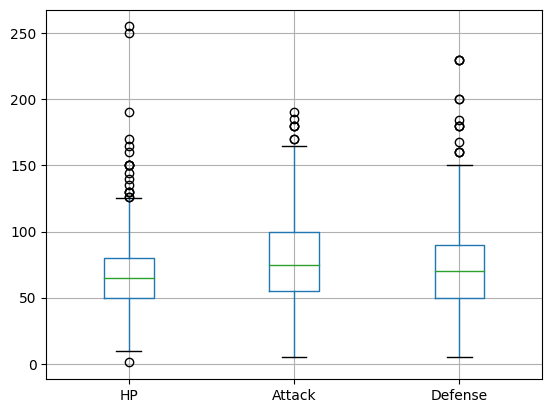

In [62]:
# ds['HP'].isnull()
import matplotlib as plt
ds.boxplot(['HP','Attack','Defense'])

